# 05 Comparative Visualization

This notebook generates scatter plots and other visualizations, comparing various dependency size metrics and linguistic factors. It uses the standardized plotting style (connecting lines to labels) for all scatter plots.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from importlib import reload

# Custom modules
import data_utils
import plotting

# Reload plotting to ensure latest style
reload(plotting)

%matplotlib inline

# Configuration
DATA_DIR = "data"
PLOTS_DIR = "plots"

## 1. Load Data

In [3]:
# Load metadata and metrics
metadata = data_utils.load_metadata(os.path.join(DATA_DIR, 'metadata.pkl'))
langNames = metadata['langNames']
langnameGroup = metadata['langnameGroup']
group_to_color = metadata['appearance_dict']

with open(os.path.join(DATA_DIR, 'all_langs_average_sizes_filtered.pkl'), 'rb') as f:
    all_langs_average_sizes_filtered = pickle.load(f)

# Load Pre-computed factors (e.g. HCS)
if os.path.exists(os.path.join(DATA_DIR, 'hcs_factors.csv')):
    hcs_df = pd.read_csv(os.path.join(DATA_DIR, 'hcs_factors.csv'))
else:
    print("Warning: hcs_factors.csv not found. Please run 04_data_processing using compute_factors.")
    hcs_df = pd.DataFrame()

if os.path.exists(os.path.join(DATA_DIR, 'vo_vs_hi_scores.csv')):
    vo_hi_df = pd.read_csv(os.path.join(DATA_DIR, 'vo_vs_hi_scores.csv'))
else:
    print("Warning: vo_vs_hi_scores.csv not found.")
    vo_hi_df = pd.DataFrame()

print(f"Loaded data for {len(all_langs_average_sizes_filtered)} languages")

Loaded metadata from data/metadata.pkl
Loaded data for 185 languages


## 2. MAL Plots (Mean Average Length)

In [4]:
# Example MAL plot
# plotting.plot_dependency_sizes(
#     'right_1_totright_2', 'right_2_totright_2',
#     'MAL',
#     all_langs_average_sizes_filtered,
#     lambda x: True,
#     langNames, langnameGroup,
#     palette=group_to_color
# )

In [5]:
# # Calculate Lists of Languages for Parallel Processing (Pickle-safe)
# # Lambda functions cannot be pickled, so we pre-calculate the lists of languages.

# indo_euro_langs = {l for l in all_langs_average_sizes_filtered if langnameGroup.get(langNames.get(l, l), 'Other') == 'Indo-European'}
# non_indo_euro_langs = {l for l in all_langs_average_sizes_filtered if langnameGroup.get(langNames.get(l, l), 'Other') != 'Indo-European'}
# head_init_langs = {l for l in all_langs_average_sizes_filtered if lang_to_head_init.get(l, 0) > 0.5}
# head_final_langs = {l for l in all_langs_average_sizes_filtered if lang_to_head_init.get(l, 0) <= 0.5}


# # 2. Generate Head-Init vs Factors Plots
# # --------------------------------------
# print("\n--- Generating Head-Init vs Factors Plots ---")
# # Combine HCS factors with Head Initiality
# if not hcs_df.empty:
#     # Check column names: compute_vo_vs_hi outputs 'language'.
#     merge_col = 'language' if 'language' in hcs_df.columns else 'language_code'
    
#     if merge_col in hcs_df.columns:
#         head_init_df = vo_hi_df[['language', 'head_initiality']].rename(columns={'language': merge_col})
#         all_factors_df = pd.merge(hcs_df, head_init_df, on=merge_col, how='inner')
        
#         # Add metadata for plotting
#         all_factors_df['group'] = all_factors_df[merge_col].map(lambda x: langnameGroup.get(langNames.get(x, x), 'Other'))
#         all_factors_df['language_name'] = all_factors_df[merge_col].map(lambda x: langNames.get(x, x))
        
#         # Plot
#         plotting.plot_head_initiality_vs_factors(all_factors_df, group_to_color)
#     else:
#         print("Warning: Could not merge HCS and Head-Init data (column mismatch).")
# else:
#     print("Warning: hcs_factors.csv not available.")


# # 3. Generate Scatter Plot Subsets (Batch)
# # ----------------------------------------
# subsets = [
#     ("Head Final Languages", "headFinal-", head_final_langs),
#     ("Head Initial Languages", "headInit-", head_init_langs),
#     ("Indo-European Languages", "IE-", indo_euro_langs),
#     ("Non-Indo-European Languages", "noIE-", non_indo_euro_langs)
# ]

# for name, prefix, lang_set in subsets:
#     print(f"\n--- Generating {name} Plots ({prefix}) ---")
#     plotting.plot_all(
#         all_langs_average_sizes_filtered, 
#         langNames, 
#         langnameGroup, 
#         filter_lang=lang_set, 
#         langname_group_or_genus=langnameGroup, 
#         folderprefix=prefix, 
#         palette=group_to_color, 
#         parallel=True
#     )

# print("\n✅ All plots generated!")

## 3. Head-Initiality vs VO Score

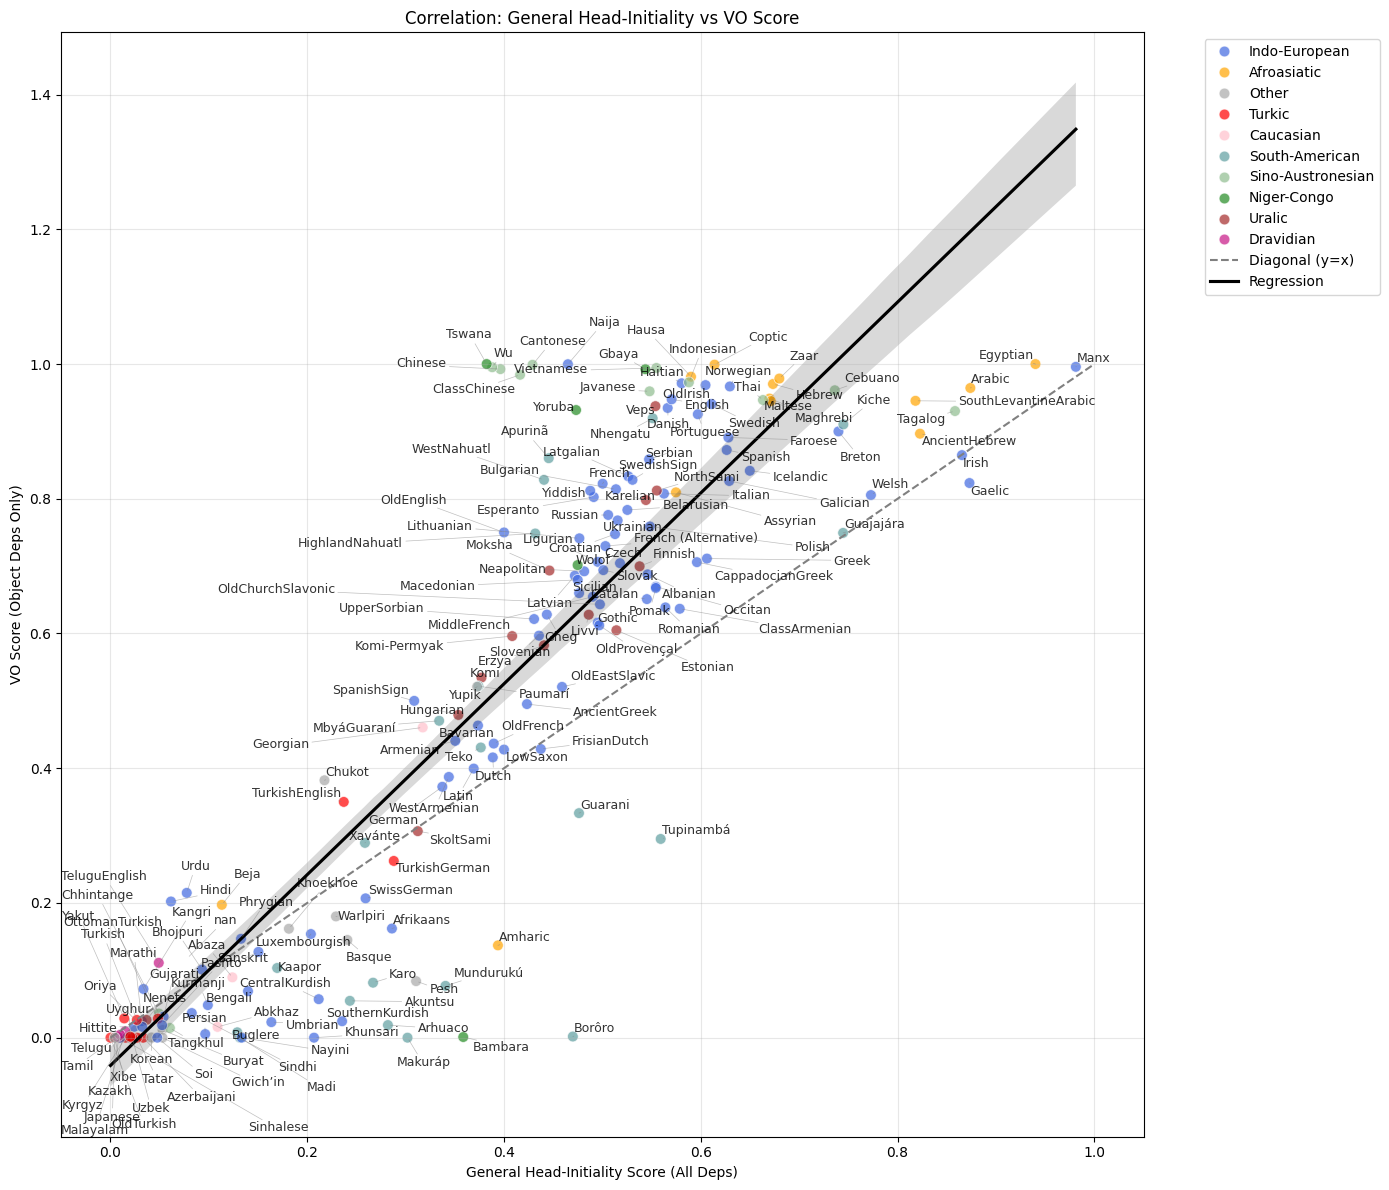

In [3]:
# Prepare data frame for plotting
if not vo_hi_df.empty:
    vo_hi_df['language_name'] = vo_hi_df['language'].map(langNames)
    vo_hi_df['group'] = vo_hi_df['language_name'].map(langnameGroup)

    plot_df = vo_hi_df.dropna(subset=['vo_score', 'head_initiality_score'])

    # Plot using standardized function
    plotting.plot_scatter_2d(
        plot_df, 
        x_col='head_initiality_score', 
        y_col='vo_score', 
        group_col='group', 
        appearance_dict=group_to_color,
        title='Correlation: General Head-Initiality vs VO Score', 
        xlabel='General Head-Initiality Score (All Deps)', 
        ylabel='VO Score (Object Deps Only)', 
        figsize=(14, 12),
        label_col='language_name',
        add_diagonal=True,
        add_regression=True
    )
else:
    print("Skipping VO plot: No data")

# creation of all plots

this takes nearly 8 minutes

In [6]:
import pandas as pd
import plotting
from importlib import reload
# Reload plotting to get the latest sns.scatterplot changes
reload(plotting)

print("Starting generation of ALL plot subsets...")

# 1. Prepare Data for Filters
# ---------------------------
# Create mapping for Head Initiality
# Note: 'vo_hi_df' should be loaded. If column is 'head_initiality_score', rename for consistency if needed.
if 'head_initiality_score' in vo_hi_df.columns:
    vo_hi_df['head_initiality'] = vo_hi_df['head_initiality_score']

# Create dictionary mapping language code to head initiality score
lang_to_head_init = vo_hi_df.set_index('language')['head_initiality'].to_dict()

# Calculate Lists of Languages for Parallel Processing (Pickle-safe)
# Lambda functions cannot be pickled, so we pre-calculate the lists of languages.

indo_euro_langs = {l for l in all_langs_average_sizes_filtered if langnameGroup.get(langNames.get(l, l), 'Other') == 'Indo-European'}
non_indo_euro_langs = {l for l in all_langs_average_sizes_filtered if langnameGroup.get(langNames.get(l, l), 'Other') != 'Indo-European'}
head_init_langs = {l for l in all_langs_average_sizes_filtered if lang_to_head_init.get(l, 0) > 0.5}
head_final_langs = {l for l in all_langs_average_sizes_filtered if lang_to_head_init.get(l, 0) <= 0.5}


# 2. Generate Head-Init vs Factors Plots
# --------------------------------------
print("\n--- Generating Head-Init vs Factors Plots ---")
# Combine HCS factors with Head Initiality
if not hcs_df.empty:
    # Check column names: compute_vo_vs_hi outputs 'language'.
    merge_col = 'language' if 'language' in hcs_df.columns else 'language_code'
    
    if merge_col in hcs_df.columns:
        head_init_df = vo_hi_df[['language', 'head_initiality']].rename(columns={'language': merge_col})
        all_factors_df = pd.merge(hcs_df, head_init_df, on=merge_col, how='inner')
        
        # Add metadata for plotting
        all_factors_df['group'] = all_factors_df[merge_col].map(lambda x: langnameGroup.get(langNames.get(x, x), 'Other'))
        all_factors_df['language_name'] = all_factors_df[merge_col].map(lambda x: langNames.get(x, x))
        
        # Plot
        plotting.plot_head_initiality_vs_factors(all_factors_df, group_to_color)
    else:
        print("Warning: Could not merge HCS and Head-Init data (column mismatch).")
else:
    print("Warning: hcs_factors.csv not available.")


# 3. Generate Scatter Plot Subsets (Batch)
# ----------------------------------------
subsets = [
    ("Head Final Languages", "headFinal-", head_final_langs),
    ("Head Initial Languages", "headInit-", head_init_langs),
    ("Indo-European Languages", "IE-", indo_euro_langs),
    ("Non-Indo-European Languages", "noIE-", non_indo_euro_langs)
]

for name, prefix, lang_set in subsets:
    print(f"\n--- Generating {name} Plots ({prefix}) ---")
    plotting.plot_all(
        all_langs_average_sizes_filtered, 
        langNames, 
        langnameGroup, 
        filter_lang=lang_set,  # Passing a SET of languages instead of a function
        langname_group_or_genus=langnameGroup, 
        folderprefix=prefix, 
        palette=group_to_color, 
        parallel=True
    )

print("\n✅ All plots generated!")

Starting generation of ALL plot subsets...

--- Generating Head-Init vs Factors Plots ---
Generating 9 scatter plots (3 versions per factor)...
Total tasks: 9
Using 80 CPU cores for parallel processing

✅ Completed 6 scatter plots in plots/head_init_vs_factors/

--- Generating Head Final Languages Plots (headFinal-) ---
_________________________ plotting all ___________________________ headFinal-
Total plots to generate: 60
Using 79 CPU cores for parallel processing


Generating plots:   0%|          | 0/60 [00:00<?, ?it/s]

✓ Saved plot: plots/headFinal-scatters/right tot 5 pos 3 vs pos 4 HCS.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 4 tot 4 vs pos 5 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 2 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 4 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 2 tot 4 vs tot 3 MAL.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 3 tot 3 vs pos 4 tot 4 DIAG.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 1 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right tot 5 pos 4 vs pos 5 HCS.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 1 tot 3 vs pos 2 tot 4 DIAG.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right tot 3 pos 1 vs pos 2 HCS.png (labels=True)
✓ Saved plot: plots/headFinal-scatters/right pos 1 tot 2 vs pos 2 tot 3 DIAG.png (labels=True)
✓ Sa

Generating plots:   0%|          | 0/60 [00:00<?, ?it/s]

✓ Saved plot: plots/headInit-scatters/right pos 4 tot 4 vs pos 5 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/headInit-scatters/right pos 4 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headInit-scatters/right tot 4 pos 3 vs pos 4 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/left tot 4 pos 2 vs pos 3 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/left pos 2 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headInit-scatters/right pos 3 tot 4 vs tot 3 MAL.png (labels=True)
✓ Saved plot: plots/headInit-scatters/left tot 5 pos 3 vs pos 4 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/right tot 5 pos 4 vs pos 5 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/right tot 3 pos 2 vs pos 3 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/left tot 3 pos 1 vs pos 2 HCS.png (labels=True)
✓ Saved plot: plots/headInit-scatters/left pos 3 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/headInit-scatters/rig

Generating plots:   0%|          | 0/60 [00:00<?, ?it/s]

✓ Saved plot: plots/IE-scatters/right tot 5 pos 2 vs pos 3 HCS.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 2 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/IE-scatters/left tot 5 pos 2 vs pos 3 HCS.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 3 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/IE-scatters/left pos 1 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 1 tot 3 vs pos 2 tot 4 DIAG.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 4 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 2 tot 2 vs pos 3 tot 3 DIAG.png (labels=True)
✓ Saved plot: plots/IE-scatters/right tot 4 pos 1 vs pos 2 HCS.png (labels=True)
✓ Saved plot: plots/IE-scatters/left pos 1 tot 4 vs pos 2 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/IE-scatters/right pos 1 tot 4 vs pos 2 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/IE-scatters/left tot 5 pos 1 vs pos 2 HCS.png (labels=True)
✓ Sa

Generating plots:   0%|          | 0/60 [00:00<?, ?it/s]

✓ Saved plot: plots/noIE-scatters/right pos 4 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right pos 4 tot 4 vs pos 5 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right pos 1 tot 4 vs pos 2 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right tot 5 pos 1 vs pos 2 HCS.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right tot 5 pos 2 vs pos 3 HCS.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right pos 2 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/noIE-scatters/right pos 1 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/noIE-scatters/left tot 5 pos 4 vs pos 5 HCS.png (labels=True)
✓ Saved plot: plots/noIE-scatters/left pos 2 tot 4 vs pos 3 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/noIE-scatters/left pos 2 tot 5 vs tot 4 MAL.png (labels=True)
✓ Saved plot: plots/noIE-scatters/left pos 3 tot 4 vs pos 4 tot 5 DIAG.png (labels=True)
✓ Saved plot: plots/noIE-scatters/left pos 4 tot 5 vs tot 4 MAL

In [ ]:
# Re-plot VO vs Head-Initiality with Diagonal and Trend Line
import plotting
from importlib import reload
reload(plotting)

print("Regenerating VO vs Head-Initiality Plot with new features...")

# Ensure data is prepared (using existing vo_hi_df from memory)
if 'vo_hi_df' in locals() and not vo_hi_df.empty:
    # Re-apply mappings just in case
    vo_hi_df['language_name'] = vo_hi_df['language'].map(langNames)
    vo_hi_df['group'] = vo_hi_df['language_name'].map(langnameGroup)
    
    # Filter valid data
    plot_df = vo_hi_df.dropna(subset=['vo_score', 'head_initiality_score'])
    
    # Plot with new flags
    plotting.plot_scatter_2d(
        plot_df, 
        x_col='head_initiality_score', 
        y_col='vo_score', 
        group_col='group', 
        appearance_dict=group_to_color,
        title='Correlation: General Head-Initiality vs VO Score', 
        xlabel='General Head-Initiality Score (All Deps)', 
        ylabel='VO Score (Object Deps Only)', 
        figsize=(14, 12),
        label_col='language_name',
        add_diagonal=True,     # <--- ADDED
        add_regression=True    # <--- ADDED
    )
else:
    print("Error: vo_hi_df not found or empty. Please run previous cells to load data.")